#Mounting Drive

In [28]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Necessary Libraries

In [10]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from IPython.display import display,HTML
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Creating a dataframe Using the Dataset

In [11]:
df=pd.read_csv('/content/drive/MyDrive/Personal/Ruba/survey lung cancer 2.csv')

In [12]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


Class Yes: 270
Class No: 39
Proportion: 6.92 : 1


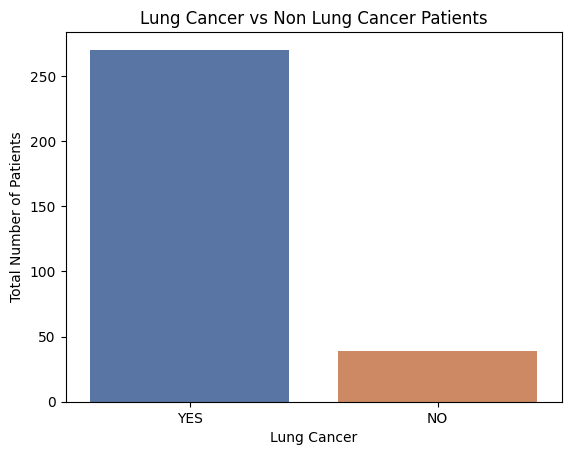

In [13]:
target_count =df['LUNG_CANCER'].value_counts()
print('Class Yes:', target_count[0])
print('Class No:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(data=df, x='LUNG_CANCER',palette='deep')

plt.xlabel('Lung Cancer')
plt.ylabel('Total Number of Patients')
plt.title('Lung Cancer vs Non Lung Cancer Patients')

plt.show()


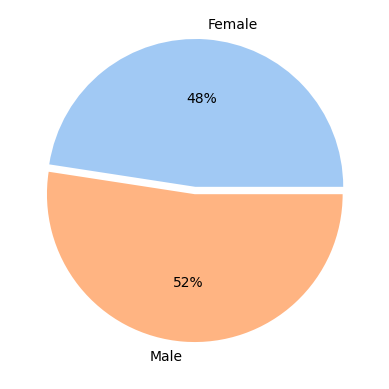

In [14]:
data = [df[df["GENDER"]=="F"] .shape[0],df[df["GENDER"]=="M"].shape[0]]
labels = ['Female', 'Male']

colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors,explode = (0.05,0), autopct='%.0f%%')
plt.show()

<ipython-input-15-227854d1a930>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


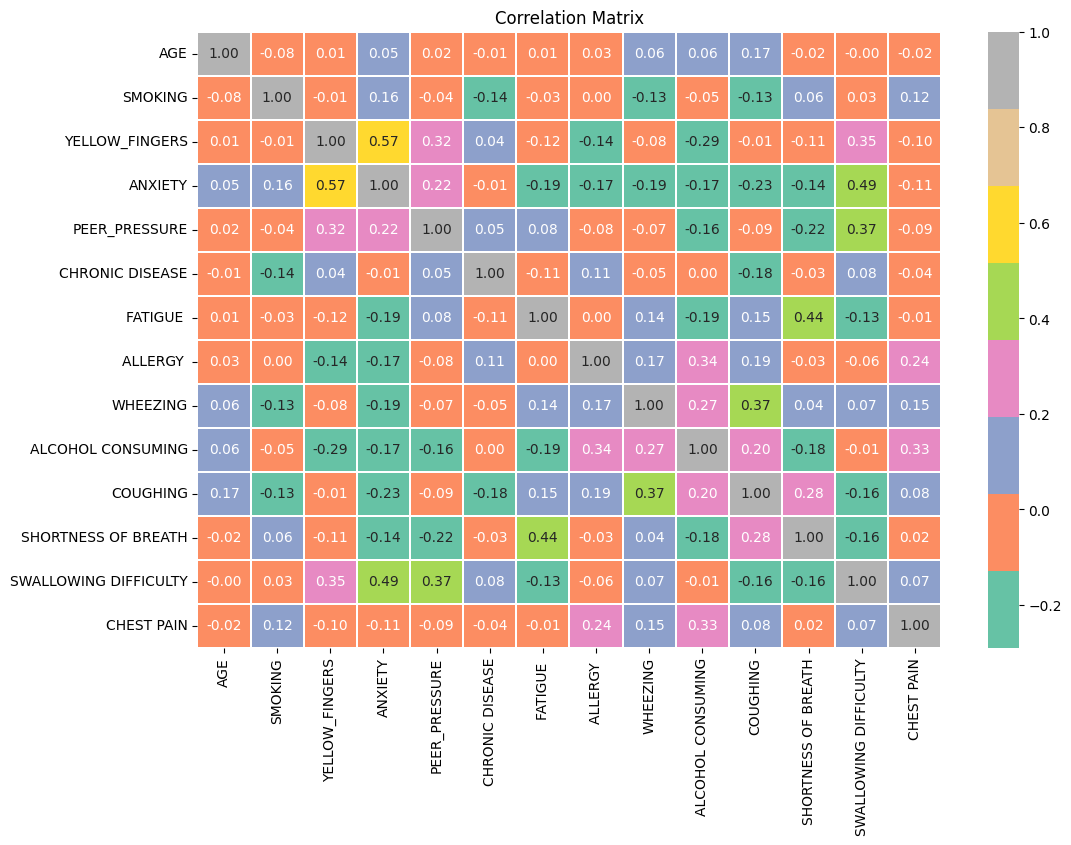

In [15]:
correlations = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlations, linecolor='white',linewidths=0.1, annot=True,fmt='.2f',cmap='Set2')
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.show()

In [16]:
encoder = LabelEncoder()
df['LUNG_CANCER']=encoder.fit_transform(df['LUNG_CANCER'])
df['GENDER']=encoder.fit_transform(df['GENDER'])
df.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [18]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [19]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

# Features used for Training Models

In [20]:
X = df.drop(['LUNG_CANCER'],axis=1)
Y = df['LUNG_CANCER']

# Splitting the dataset for training and testing

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=100)

# Logistic Regression

In [22]:
model_LR=LogisticRegression()
model_LR.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Random Forest

In [23]:
model_RF = RandomForestClassifier(n_estimators=500, random_state=42)
model_RF.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

# Support Vector Machine

In [24]:
svm = svm.SVC()


param_grid = {
    'kernel': ['sigmoid', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}


grid_search = GridSearchCV(svm, param_grid, cv=3)
grid_search.fit(X_train, Y_train)

model_SVM = grid_search.best_estimator_


# Neural Network

In [25]:
model_NN = Sequential([
    Dense(100, activation='relu', kernel_initializer='he_uniform', input_shape=(15,)),
    Dense(100, activation='relu', kernel_initializer='he_uniform'),
    Dense(100, activation='relu', kernel_initializer='he_uniform'),
    Dense(1, activation='sigmoid')
])
model_NN.summary()

model_NN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model_NN.fit(X_train, Y_train, batch_size=None, epochs=20)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1600      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21901 (85.55 KB)
Trainable params: 21901 (85.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - 1s 3ms/step - loss: 1.8647 - accuracy: 0.7662
Epoch 2/20
8/8 [==============================] - 0s 2ms

# Save Models

In [26]:
# joblib.dump(model_SVM,'/content/drive/MyDrive/Personal/Ruba/model_LR.pkl')
# joblib.dump(model_SVM,'/content/drive/MyDrive/Personal/Ruba/model_RF.pkl')
# joblib.dump(model_SVM,'/content/drive/MyDrive/Personal/Ruba/model_SVM.pkl')
# joblib.dump(model_SVM,'/content/drive/MyDrive/Personal/Ruba/model_NN.pkl')

['/content/drive/MyDrive/Personal/Ruba/model_NN.pkl']

# Loading Models

In [27]:
model_path1 = '/content/drive/MyDrive/Personal/Ruba/model_LR.pkl'
model_path2 = '/content/drive/MyDrive/Personal/Ruba/model_RF.pkl'
model_path3 = '/content/drive/MyDrive/Personal/Ruba/model_SVM.pkl'
model_path4 = '/content/drive/MyDrive/Personal/Ruba/model_NN.pkl'
model_LR= joblib.load(model_path1)
model_RF= joblib.load(model_path2)
model_SVM= joblib.load(model_path3)
model_NN= joblib.load(model_path4)

# Accuracy, Precision, Recall & F1-Score  Calculation

In [ ]:
y_pred_LR = model_LR.predict(X_test)
y_pred_RF = model_RF.predict(X_test)
y_pred_SVM = model_SVM.predict(X_test)
y_pred_NN = (model_NN.predict(X_test)>= 0.5).astype(int)

loss, accuracy_NN = model_NN.evaluate(X_test, Y_test)

accuracy_values =[
    accuracy_score (Y_test, y_pred_LR),
    accuracy_score (Y_test, y_pred_RF),
    accuracy_score (Y_test, y_pred_SVM),
    accuracy_NN
  ]

precision_values = [
    precision_score(Y_test, y_pred_LR),
    precision_score(Y_test, y_pred_RF),
    precision_score(Y_test, y_pred_SVM),
    precision_score(Y_test, y_pred_NN)

]

recall_values = [
    recall_score(Y_test, y_pred_LR),
    recall_score(Y_test, y_pred_RF),
    recall_score(Y_test, y_pred_SVM),
    recall_score(Y_test, y_pred_NN)
]

f1_values = [
    f1_score(Y_test, y_pred_LR),
    f1_score(Y_test, y_pred_RF),
    f1_score(Y_test, y_pred_SVM),
    f1_score(Y_test, y_pred_NN)
]









3/3 [==============================] - 0s 6ms/step - loss: 0.2658 - accuracy: 0.8974


# Accuracy, Precision, Recall & F1-Score Comparison

In [ ]:
model_names = ["Logistic Regression", "Random Forest", "Support Vector Machine", "Neural Network"]

# Print individual accuracies, precisions, recalls, and F1 scores
for model_name, accuracy, precision, recall, f1 in zip(model_names, accuracy_values, precision_values, recall_values, f1_values):
    print('Metrics for {}:'.format(model_name))
    print('  Accuracy: {:.2f}%'.format(accuracy * 100))
    print('  Precision: {:.2f}'.format(precision))
    print('  Recall: {:.2f}'.format(recall))
    print('  F1 Score: {:.2f}'.format(f1))
    print('------')

# Determine the best model based on accuracy
best_model_acc = model_names[accuracy_values.index(max(accuracy_values))]
best_model_pre = model_names[precision_values.index(max(precision_values))]
best_model_rec = model_names[recall_values.index(max(recall_values))]
best_model_f1 = model_names[f1_values.index(max(f1_values))]
best_accuracy = max(accuracy_values)
best_precision = max(precision_values)
best_recall = max(recall_values)
best_f1 = max(f1_values)
print('Best model based on accuracy: {} with accuracy {:.2f}%\n'.format(best_model_acc, best_accuracy * 100))
print('Best model based on precision: {} with precision {:.2f}%\n'.format(best_model_pre, best_precision * 100))
print('Best model based on recall: {} with recall {:.2f}%\n'.format(best_model_rec, best_recall * 100))
print('Best model based on f1-score: {} with f1-score {:.2f}%'.format(best_model_f1, best_f1 * 100))

Metrics for Logistic Regression:
  Accuracy: 94.87%
  Precision: 0.96
  Recall: 0.99
  F1 Score: 0.97
------
Metrics for Random Forest:
  Accuracy: 96.15%
  Precision: 0.97
  Recall: 0.99
  F1 Score: 0.98
------
Metrics for Support Vector Machine:
  Accuracy: 91.03%
  Precision: 0.92
  Recall: 0.99
  F1 Score: 0.95
------
Metrics for Neural Network:
  Accuracy: 89.74%
  Precision: 0.90
  Recall: 1.00
  F1 Score: 0.95
------
Best model based on accuracy: Random Forest with accuracy 96.15%

Best model based on precision: Random Forest with precision 97.18%

Best model based on recall: Neural Network with recall 100.00%

Best model based on f1-score: Random Forest with f1-score 97.87%


# Bar Chart of Accuracy

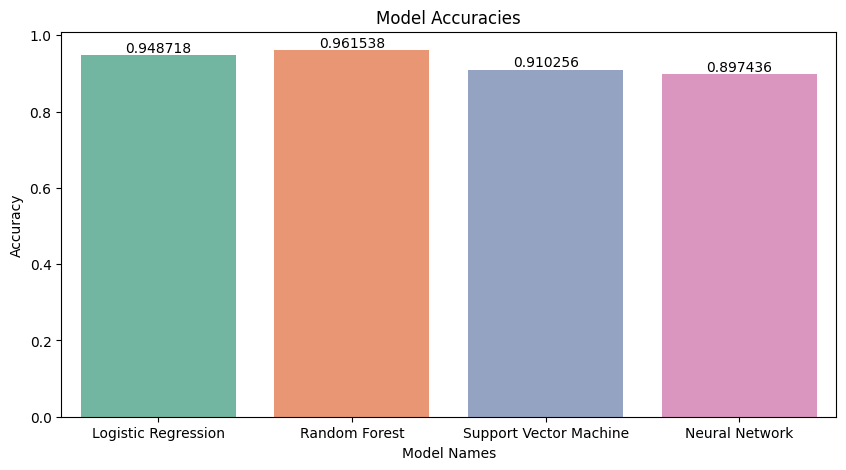

In [ ]:
data = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_values})


plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Model', y='Accuracy', data=data, palette='Set2')
plt.title('Model Accuracies')
plt.xlabel('Model Names')
plt.ylabel('Accuracy')
ax.bar_label(ax.containers[0])
plt.show()




# Bar Chart of Precision

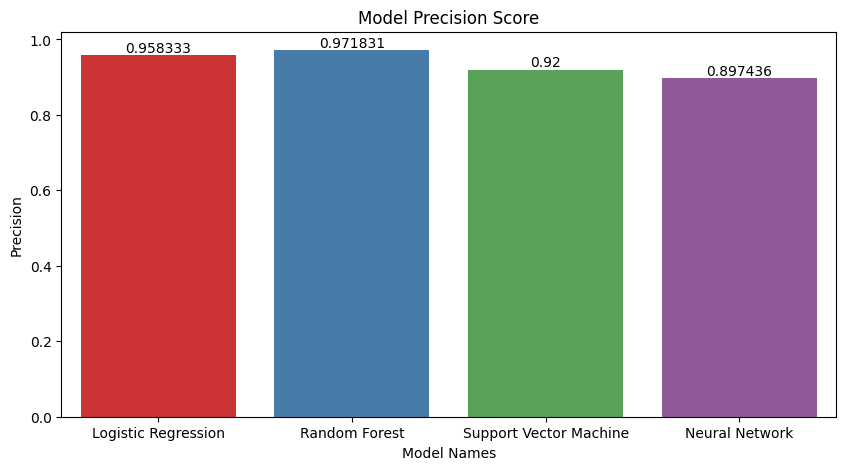

In [ ]:
data2 = pd.DataFrame({'Model': model_names, 'Precision': precision_values})

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Model', y='Precision', data=data2, palette='Set1')
plt.title('Model Precision Score')
plt.xlabel('Model Names')
plt.ylabel('Precision')
ax.bar_label(ax.containers[0])
plt.show()

# Bar Chart of Recall

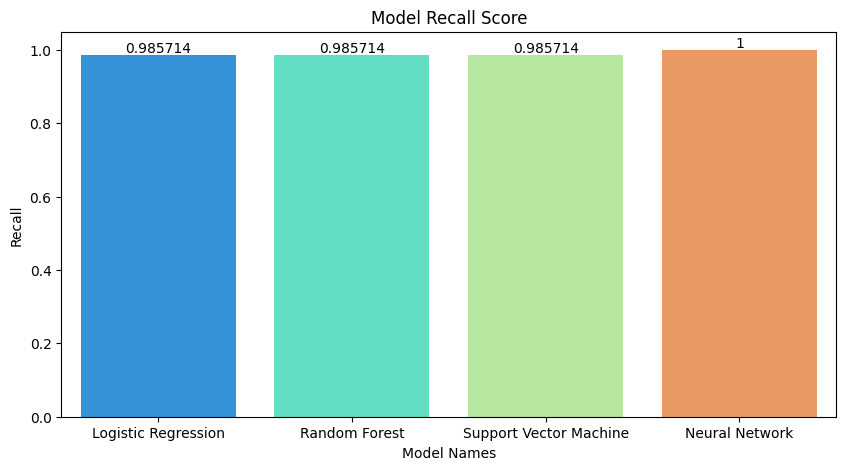

In [ ]:
data3 = pd.DataFrame({'Model': model_names, 'Recall': recall_values})


plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Model', y='Recall', data=data3, palette='rainbow')
plt.title('Model Recall Score')
plt.xlabel('Model Names')
plt.ylabel('Recall')
ax.bar_label(ax.containers[0])
plt.show()

# Bar Chart of F1-Score

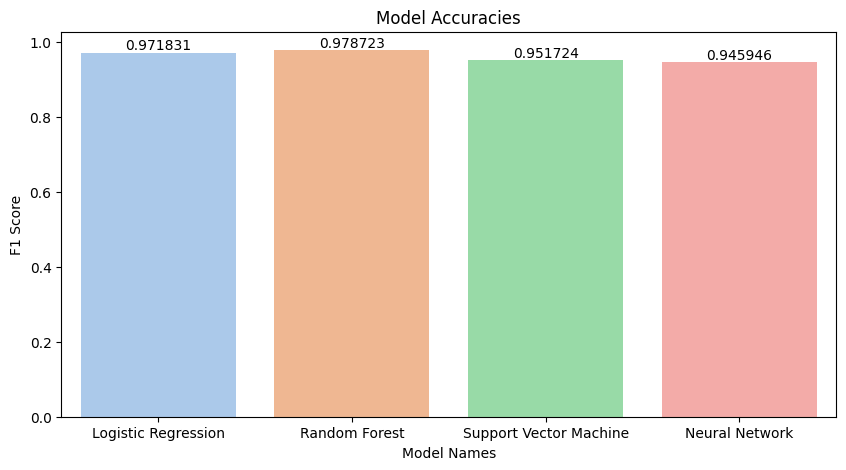

In [ ]:
# Create a DataFrame for visualization
data = pd.DataFrame({'Model': model_names, 'F1': f1_values})

# Plotting
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Model', y='F1', data=data, palette='pastel')
plt.title('Model Accuracies')
plt.xlabel('Model Names')
plt.ylabel('F1 Score')
ax.bar_label(ax.containers[0])
plt.show()

# Best Model Based on Consistency in All 4 aspect

Confusion Matrix

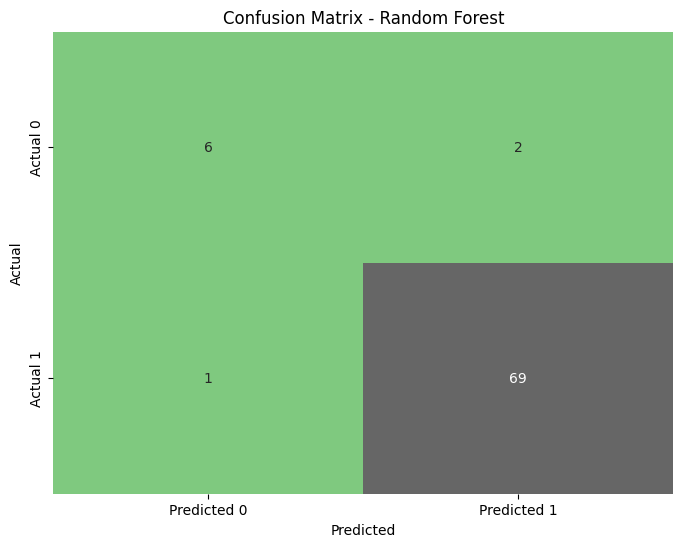

In [ ]:
conf_matrix_RF = confusion_matrix(Y_test, y_pred_RF)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_RF, annot=True, cmap='Accent', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


ROC Curve

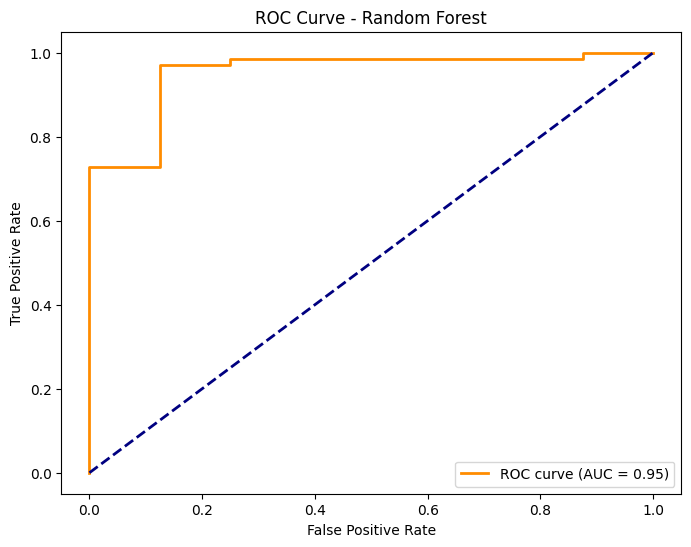

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, model_RF.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(Y_test, model_RF.predict_proba(X_test)[:, 1])


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()




# Predict Function

In [ ]:
def predict_cancer(age):

    selected_values = get_selected_values(radio_buttons)
    gender = selected_values['Gender']
    pressure = selected_values['Pressure']
    smoking = selected_values['Smoking']
    fingers = selected_values['Fingers']
    anxiety = selected_values['Anxiety']
    chronic = selected_values['Chronic']
    fatigue = selected_values['Fatigue']
    allergy = selected_values['Allergy']
    wheezing = selected_values['Wheezing']
    alcohol = selected_values['Alcohol']
    coughing = selected_values['Coughing']
    breath = selected_values['Breath']
    swallowing = selected_values['Swallowing']
    chest = selected_values['Chest']



    input_data = pd.DataFrame(columns=X.columns)
    input_data.loc[0] = 0

    input_data.loc[0, 'GENDER'] = gender
    input_data.loc[0, 'AGE'] = age
    input_data.loc[0, 'SMOKING'] = smoking
    input_data.loc[0, 'YELLOW_FINGERS'] = fingers
    input_data.loc[0, 'ANXIETY'] = anxiety
    input_data.loc[0, 'PEER_PRESSURE'] = pressure
    input_data.loc[0, 'CHRONIC DISEASE'] = chronic
    input_data.loc[0, 'FATIGUE '] = fatigue
    input_data.loc[0, 'ALLERGY '] = allergy
    input_data.loc[0, 'WHEEZING'] = wheezing
    input_data.loc[0, 'ALCOHOL CONSUMING'] = alcohol
    input_data.loc[0, 'COUGHING'] = coughing
    input_data.loc[0, 'SHORTNESS OF BREATH'] = breath
    input_data.loc[0, 'SWALLOWING DIFFICULTY'] = swallowing
    input_data.loc[0, 'CHEST PAIN'] = chest

    prediction = model_RF.predict(input_data)[0]

    if prediction==0:
      cancer_prediction.value="No, Patient doesn't have Lung Cancer"
    else:
      cancer_prediction.value="Yes, Patie`nt have Lung Cancer"






# Functions for Creating Buttons

In [ ]:
def create_radio_buttons(all_mappings):
    radio_buttons = {}
    for category, mapping in all_mappings.items():
        radio_buttons[category] = widgets.RadioButtons(
            options=mapping.keys(),
            value=list(mapping.keys())[0],
            description=f'{category}:'
        )
        display(radio_buttons[category])

    return radio_buttons

def get_selected_values(radio_buttons):
    selected_values = {}
    for category, button in radio_buttons.items():
        selected_values[category] = int(all_mappings[category][button.value])
    return selected_values

# User Input

In [ ]:
all_mappings = {
    'Gender': {'Male': 1, 'Female': 0},
    'Pressure': {'Yes': 2, 'No': 1},
    'Smoking': {'Yes': 2, 'No': 1},
    'Fingers': {'Yes': 2, 'No': 1},
    'Anxiety': {'Yes': 2, 'No': 1},
    'Chronic': {'Yes': 2, 'No': 1},
    'Fatigue': {'Yes': 2, 'No': 1},
    'Allergy': {'Yes': 2, 'No': 1},
    'Wheezing': {'Yes': 2, 'No': 1},
    'Alcohol': {'Yes': 2, 'No': 1},
    'Coughing': {'Yes': 2, 'No': 1},
    'Breath': {'Yes': 2, 'No': 1},
    'Swallowing': {'Yes': 2, 'No': 1},
    'Chest': {'Yes': 2, 'No': 1}
}

radio_buttons = create_radio_buttons(all_mappings)
age= widgets.BoundedIntText(min=0,description='Age')


predict_button = widgets.Button(description='Predict')
cancer_prediction = widgets.Textarea(description='Prediction:')



predict_button.on_click(lambda x: predict_cancer(age.value))
display(age,predict_button,cancer_prediction)


RadioButtons(description='Gender:', options=('Male', 'Female'), value='Male')

RadioButtons(description='Pressure:', options=('Yes', 'No'), value='Yes')

RadioButtons(description='Smoking:', options=('Yes', 'No'), value='Yes')

RadioButtons(description='Fingers:', options=('Yes', 'No'), value='Yes')

RadioButtons(description='Anxiety:', options=('Yes', 'No'), value='Yes')

RadioButtons(description='Chronic:', options=('Yes', 'No'), value='Yes')

RadioButtons(description='Fatigue:', options=('Yes', 'No'), value='Yes')

RadioButtons(description='Allergy:', options=('Yes', 'No'), value='Yes')

RadioButtons(description='Wheezing:', options=('Yes', 'No'), value='Yes')

RadioButtons(description='Alcohol:', options=('Yes', 'No'), value='Yes')

RadioButtons(description='Coughing:', options=('Yes', 'No'), value='Yes')

RadioButtons(description='Breath:', options=('Yes', 'No'), value='Yes')

RadioButtons(description='Swallowing:', options=('Yes', 'No'), value='Yes')

RadioButtons(description='Chest:', options=('Yes', 'No'), value='Yes')

BoundedIntText(value=0, description='Age')

Button(description='Predict', style=ButtonStyle())

Textarea(value='', description='Prediction:')